<a href="https://colab.research.google.com/github/qazizia/Python/blob/master/AI_AGENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
class Displayable(object):
    """Class that uses 'display'.
    The amount of detail is controlled by max_display_level
    """
    max_display_level = 1   # can be overridden in subclasses

    def display(self,level,*args,**nargs):
        """print the arguments if level is less than or equal to the
        current max_display_level.
        level is an integer.
        the other arguments are whatever arguments print can take.
        """
        if level <= self.max_display_level:
            print(*args, **nargs)  ##if error you are using Python2 not Python3

def visualize(func):
    """A decorator for algorithms that do interactive visualization.
    Ignored here.
    """
    return func

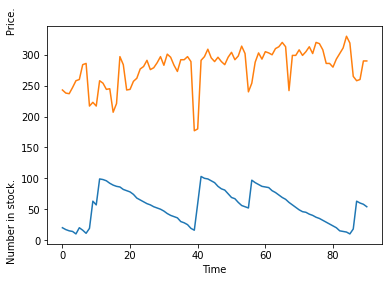

In [11]:
# agents.py - Agent and Controllers
# AIFCA Python3 code Version 0.9.5 Documentation at http://aipython.org
# Download the zip file and read aipython.pdf for documentation

# Artificial Intelligence: Foundations of Computational Agents http://artint.info
# Copyright David L Poole and Alan K Mackworth 2017-2022.
# This work is licensed under a Creative Commons
# Attribution-NonCommercial-ShareAlike 4.0 International License.
# See: http://creativecommons.org/licenses/by-nc-sa/4.0/deed.en

import random

class Agent(object):
    def __init__(self,env):
        """set up the agent"""
        self.env=env

    def go(self,n):
        """acts for n time steps"""
        raise NotImplementedError("go")   # abstract method
        
#from display import Displayable
class Environment(Displayable):
    def initial_percepts(self):
        """returns the initial percepts for the agent"""
        raise NotImplementedError("initial_percepts")   # abstract method

    def do(self,action):
        """does the action in the environment
        returns the next percept """
        raise NotImplementedError("do")   # abstract method

class TP_env(Environment):
    prices = [234, 234, 234, 234, 255, 255, 275, 275, 211, 211, 211,
    234, 234, 234, 234, 199, 199, 275, 275, 234, 234, 234, 234, 255,
    255, 260, 260, 265, 265, 265, 265, 270, 270, 255, 255, 260, 260,
    265, 265, 150, 150, 265, 265, 270, 270, 255, 255, 260, 260, 265,
    265, 265, 265, 270, 270, 211, 211, 255, 255, 260, 260, 265, 265,
    260, 265, 270, 270, 205, 255, 255, 260, 260, 265, 265, 265, 265,
    270, 270]
    max_price_addon = 20  # maximum of random value added to get price

    def __init__(self):
        """paper buying agent"""
        self.time=0
        self.stock=20
        self.stock_history = []  # memory of the stock history
        self.price_history = []  # memory of the price history

    def initial_percepts(self):
        """return initial percepts"""
        self.stock_history.append(self.stock)
        price = self.prices[0]+random.randrange(self.max_price_addon)
        self.price_history.append(price)
        return {'price': price,
                'instock': self.stock}

    def do(self, action):
        """does action (buy) and returns percepts (price and instock)"""
        used = pick_from_dist({6:0.1, 5:0.1, 4:0.2, 3:0.3, 2:0.2, 1:0.1})
        bought = action['buy']
        self.stock = self.stock+bought-used
        self.stock_history.append(self.stock)
        self.time += 1
        price = (self.prices[self.time%len(self.prices)] # repeating pattern
                 +random.randrange(self.max_price_addon) # plus randomness
                 +self.time//2)                          # plus inflation
        self.price_history.append(price)
        return {'price': price,
                'instock': self.stock}

def pick_from_dist(item_prob_dist):
    """ returns a value from a distribution.
    item_prob_dist is an item:probability dictionary, where the
        probabilities sum to 1.
    returns an item chosen in proportion to its probability
    """
    ranreal = random.random()
    for (it,prob) in item_prob_dist.items():
        if ranreal < prob:
            return it
        else:
            ranreal -= prob
    raise RuntimeError(str(item_prob_dist)+" is not a probability distribution")

class TP_agent(Agent):
    def __init__(self, env):
        self.env = env
        self.spent = 0
        percepts = env.initial_percepts()
        self.ave = self.last_price = percepts['price']
        self.instock = percepts['instock']
        
    def go(self, n):
        """go for n time steps
        """
        for i in range(n):
            if self.last_price < 0.9*self.ave and self.instock < 60:
                tobuy = 48
            elif self.instock < 12:
                tobuy = 12
            else:
                tobuy = 0
            self.spent += tobuy*self.last_price
            percepts = env.do({'buy': tobuy})
            self.last_price = percepts['price']
            self.ave = self.ave+(self.last_price-self.ave)*0.05
            self.instock = percepts['instock']

env = TP_env()
ag = TP_agent(env)
#ag.go(90)
#ag.spent/env.time   ## average spent per time period

import matplotlib.pyplot as plt

class Plot_prices(object):
    """Set up the plot for history of price and number in stock"""
    def __init__(self, ag,env):
        self.ag = ag
        self.env = env
        plt.ion()
        plt.xlabel("Time")
        plt.ylabel("Number in stock.                                              Price.")

    def plot_run(self):
        """plot history of price and instock"""
        num = len(env.stock_history)
        plt.plot(range(num),env.stock_history,label="In stock")
        plt.plot(range(num),env.price_history,label="Price")
        #plt.legend(loc="upper left")
        plt.draw()

pl = Plot_prices(ag,env)
ag.go(90); pl.plot_run()
